### Philippine Earthquakes Dataset (from PHIVOLCS)

The dataset in this analysis contains earthquake records from the Philippine Institute of Volcanology and Seismology (PHIVOLCS), sourced from Kaggle at the following link: https://www.kaggle.com/datasets/bwandowando/philippine-earthquakes-from-phivolcs. It includes detailed information about earthquakes in the Philippines, such as the date and time of occurrence, geographical coordinates (latitude and longitude), depth, magnitude, and location descriptions.

In [2]:
import pandas as pd

# Load the dataset to examine its contents
file_path = 'phivolcs_earthquake_data.csv'
earthquake_data = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
earthquake_data.head()

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location
0,2016-01-01 00:40:00,17.34,120.30,023,3.0,015 km N 87° W of San Esteban (Ilocos Sur)
1,2016-01-01 05:06:00,14.65,123.12,017,3.3,054 km N 42° E of Paracale (Camarines Norte)
2,2016-01-01 13:24:00,09.76,125.46,012,2.4,005 km S 42° W of Surigao City
3,2016-01-01 15:01:00,17.30,120.27,026,2.9,018 km S 81° W of San Esteban (Ilocos Sur)
4,2016-01-01 20:27:00,08.89,126.28,024,3.0,004 km S 44° W of Cagwait (Surigao del Sur)


## Data Processing

Here are the steps to start with the data preprocessing:

1. **Convert DateTime Column** - The first step is to convert the Date_Time_PH column from a string format to a datetime format. This allows for time-based analysis and operations, such as extracting specific components like year, month, or time.

2. **Convert Depth to Numeric** - The Depth_In_Km column is then converted to a numeric type. This is important for depth-based analysis, ensuring that non-numeric values are set to NaN to prevent errors in calculations or visualizations.

3. **Check for Missing Data** - After the conversions, missing values are checked. This helps identify any columns with missing or invalid entries. In this case, the Depth_In_Km column has some missing values that will need to be handled in the next steps.

This prepares the dataset for further analysis by ensuring that key columns are in the correct format and by identifying any missing values.

In [3]:
# Convert Date_Time_PH to datetime format for easier analysis
earthquake_data['Date_Time_PH'] = pd.to_datetime(earthquake_data['Date_Time_PH'], format='%Y-%m-%d %H:%M:%S')

# Convert Depth_In_Km to numeric, ensuring any non-numeric values are converted to NaN
earthquake_data['Depth_In_Km'] = pd.to_numeric(earthquake_data['Depth_In_Km'], errors='coerce')

# Check for missing values in the dataset after conversion
missing_values_summary = earthquake_data.isnull().sum()

# Display the updated dataset and missing values summary
print(earthquake_data.head())
print("\nMissing Values Summary:")
print(missing_values_summary)


         Date_Time_PH Latitude Longitude  Depth_In_Km  Magnitude  \
0 2016-01-01 00:40:00    17.34    120.30         23.0        3.0   
1 2016-01-01 05:06:00    14.65    123.12         17.0        3.3   
2 2016-01-01 13:24:00    09.76    125.46         12.0        2.4   
3 2016-01-01 15:01:00    17.30    120.27         26.0        2.9   
4 2016-01-01 20:27:00    08.89    126.28         24.0        3.0   

                                       Location  
0    015 km N 87° W of San Esteban (Ilocos Sur)  
1  054 km N 42° E of Paracale (Camarines Norte)  
2                005 km S 42° W of Surigao City  
3    018 km S 81° W of San Esteban (Ilocos Sur)  
4   004 km S 44° W of Cagwait (Surigao del Sur)  

Missing Values Summary:
Date_Time_PH     0
Latitude         0
Longitude        0
Depth_In_Km     27
Magnitude        0
Location         0
dtype: int64


In [28]:
earthquake_data['Location'].value_counts()['005 km S 42° W of Surigao City']

1

### Options for Handling Missing Values:

1. Remove Rows with Missing Depth - This is suitable if the number of missing values is small and won’t significantly impact the analysis.
2. Impute Missing Values - Replace missing values with a calculated estimate such as the mean, median, or a constant value. This can preserve the data points while filling in the missing information.
3. Use Domain Knowledge - If there’s a specific rule based on the location or other columns, you can use that to fill in missing depths.

In [4]:
# Impute missing Depth_In_Km values with the median depth
median_depth = earthquake_data['Depth_In_Km'].median()
earthquake_data['Depth_In_Km'].fillna(median_depth, inplace=True)

# Verify if missing values are handled
print(earthquake_data.isnull().sum())


Date_Time_PH    0
Latitude        0
Longitude       0
Depth_In_Km     0
Magnitude       0
Location        0
dtype: int64


## Exploratory Data Analysis (EDA)
In this step, we’ll focus on gaining insights from the dataset by performing some basic statistical analysis and creating visualizations to explore the trends and patterns in the data.

1. **Descriptive Statistics**
     - Calculate basic statistics for key numerical columns such as Magnitude and Depth_In_Km.
2. **Time-Based Analysis**
     - Analyze the frequency of earthquakes over time (yearly, monthly, daily).
3. **Magnitude Distribution**
     - Analyze the distribution of earthquake magnitudes to understand the range and most common magnitudes.
4. **Geographical Distribution**
     - Visualize the locations of the earthquakes based on latitude and longitude.

Descriptive Statistics:
          Magnitude   Depth_In_Km
count  93119.000000  93119.000000
mean       2.550459     30.393572
std        0.695607     38.855252
min        1.000000      0.000000
25%        2.100000      9.000000
50%        2.400000     21.000000
75%        2.900000     33.000000
max        7.500000   1068.000000


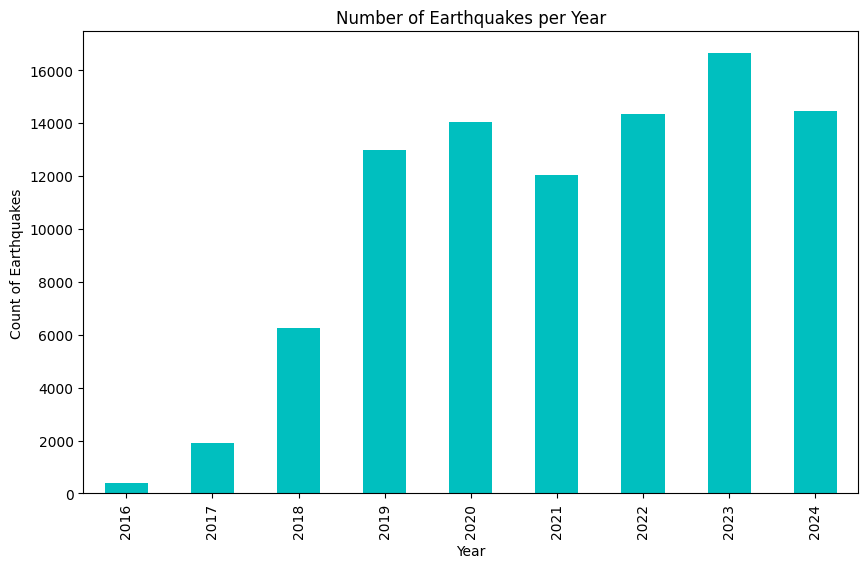

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics for Magnitude and Depth
print("Descriptive Statistics:")
print(earthquake_data[['Magnitude', 'Depth_In_Km']].describe())

# 2. Time-Based Analysis: Adding a Year and Month column for time-based analysis
earthquake_data['Year'] = earthquake_data['Date_Time_PH'].dt.year
earthquake_data['Month'] = earthquake_data['Date_Time_PH'].dt.month

# Count of earthquakes by year
plt.figure(figsize=(10, 6))
earthquake_data['Year'].value_counts().sort_index().plot(kind='bar', color='c')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Count of Earthquakes')
plt.show()


### Key Observations:
1. Steady Increase in Earthquakes (2016–2020):
    - From 2016 to 2020, the number of earthquakes recorded each year shows a steady increase.
    - The most significant rise is from 2017 to 2018 and from 2018 to 2019, indicating a sharp increase in seismic activity during these years.
2. Peak in 2023:
    - The highest number of earthquakes is recorded in 2023, with a total exceeding 16,000 events.
    - This suggests 2023 was an exceptionally active year for earthquakes compared to prior years.
3. Slight Decrease in 2021 and 2024:
    - There is a noticeable drop in the number of earthquakes from 2020 to 2021. However, the frequency rebounds again in 2022 and peaks in 2023.
    - The year 2024, although not yet complete, still shows high earthquake activity compared to the earlier years (2016–2018).
4. Recent Consistency:
    - From 2020 onwards, there seems to be a relatively consistent number of earthquakes per year, with fluctuations but no dramatic drops.
#### Potential Explanations:
- The increase in earthquakes might be attributed to natural causes such as tectonic activity along fault lines in the region or improved seismic monitoring and data collection technologies.
- The high number of earthquakes in 2023 may warrant further investigation into geological conditions during that year.
#### Next Steps:
- Further analysis could explore whether these changes are related to specific geological events, such as volcanic activity or major tectonic shifts.
- We can also investigate the distribution of magnitudes over time to determine if the increase in frequency is associated with stronger or weaker earthquakes.

/tmp/ipykernel_91095/2099648819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_data_filtered['Year'] = earthquake_data_filtered['Date_Time_PH'].dt.year


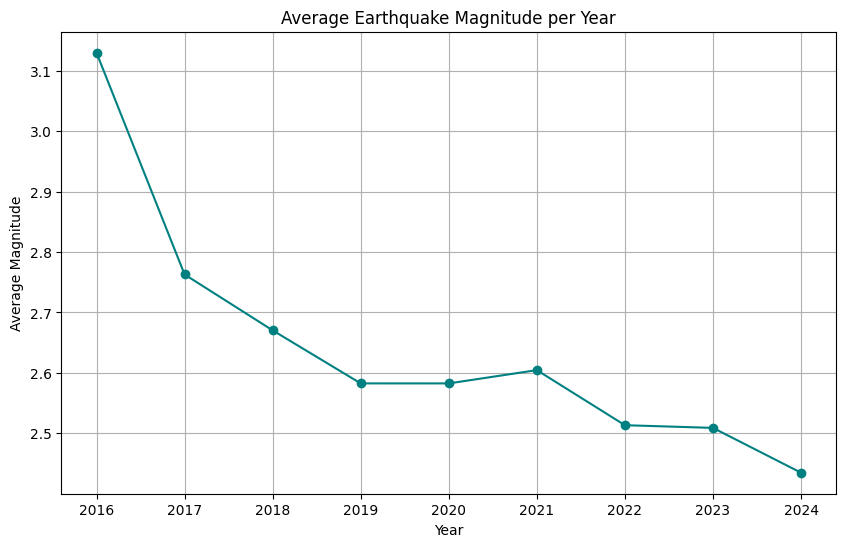

In [12]:
# Extract the year from the Date_Time_PH column
earthquake_data_filtered['Year'] = earthquake_data_filtered['Date_Time_PH'].dt.year

# Group data by year and calculate the mean magnitude for each year
magnitude_trend = earthquake_data_filtered.groupby('Year')['Magnitude'].mean()

# Plot the trend of average earthquake magnitudes over the years
plt.figure(figsize=(10, 6))
magnitude_trend.plot(kind='line', marker='o', color='teal')
plt.title('Average Earthquake Magnitude per Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()


### Analysis of the Average Earthquake Magnitude per Year:
1. General Decline in Average Magnitude:
    - The plot shows a clear downward trend in the average magnitude of earthquakes from 2016 to 2024. This suggests that, while the number of earthquakes may have increased over time (as shown in the previous graph), the earthquakes have generally been weaker in terms of magnitude.
2. Initial High in 2016:
    - In 2016, the average magnitude was above 3.1, the highest in the dataset. This could indicate fewer but more intense earthquakes in that year.
3. Stabilization:
    - From 2020 to 2023, the average magnitude hovers between 2.5 and 2.7, showing a slight increase in 2021 but ultimately continuing the downward trend.
4. 2024 Data:
    - Since 2024 is still ongoing, the average magnitude might be lower because of incomplete data for the year.
#### Possible Interpretation:
- The overall decrease in average magnitude may indicate a shift towards more frequent but smaller seismic events.
- It would be interesting to compare this trend with the distribution of earthquake depths to see if there’s a correlation between depth and magnitude.

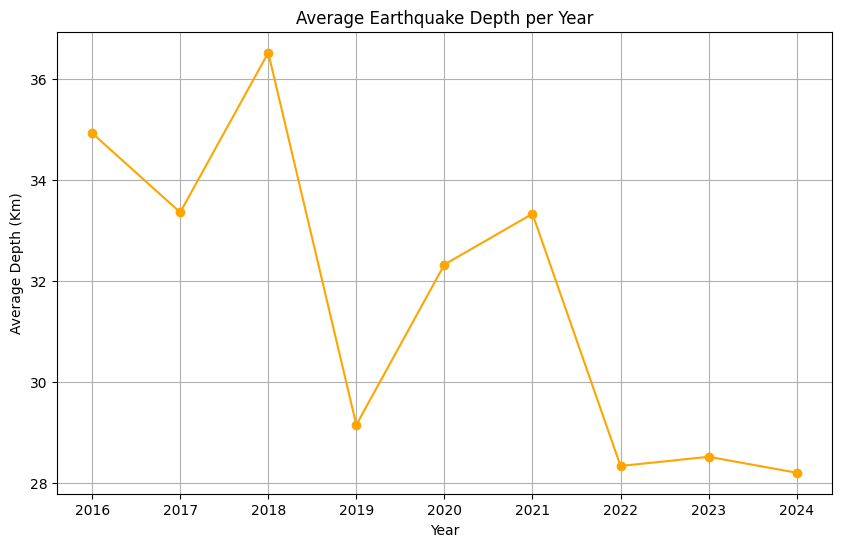

In [13]:
# Group data by year and calculate the mean depth for each year
depth_trend = earthquake_data_filtered.groupby('Year')['Depth_In_Km'].mean()

# Plot the trend of average earthquake depth over the years
plt.figure(figsize=(10, 6))
depth_trend.plot(kind='line', marker='o', color='orange')
plt.title('Average Earthquake Depth per Year')
plt.xlabel('Year')
plt.ylabel('Average Depth (Km)')
plt.grid(True)
plt.show()


### Analysis of the Average Earthquake Depth per Year:
1. Fluctuating Depth:
    - The average earthquake depth shows noticeable fluctuations from 2016 to 2024.
    - In 2018, there is a peak, with the average depth reaching around 36 km, followed by a significant drop in 2019 to below 30 km.
2. Shallowing of Earthquakes:
    - From 2021 to 2024, there’s a general trend towards shallower earthquakes, with the average depth falling to around 28 km by 2022 and remaining relatively low in the following years.
    - Shallower earthquakes are often more destructive because they are closer to the surface, which could be a point of concern if this trend continues.
3. Deep Earthquakes in Certain Years:
    - The deeper earthquakes in 2018 and 2021 might have been related to specific tectonic events or anomalies in geological activity during those years.
#### Insights from the Combined Trends:
1. **Magnitude vs. Depth**:
    - Interestingly, while the average earthquake magnitude has been declining, the depth has also been fluctuating significantly. However, the overall trend shows that both the magnitude and depth of earthquakes have decreased since 2021.
    - This may suggest that while the frequency of earthquakes is increasing, most of them are weaker and occur at shallower depths.
2. **Shallow but Frequent Earthquakes**:
    - The combination of lower magnitude and shallower depth may indicate more frequent but less intense seismic activity. It could also suggest a change in the behavior of the tectonic plates in this region.

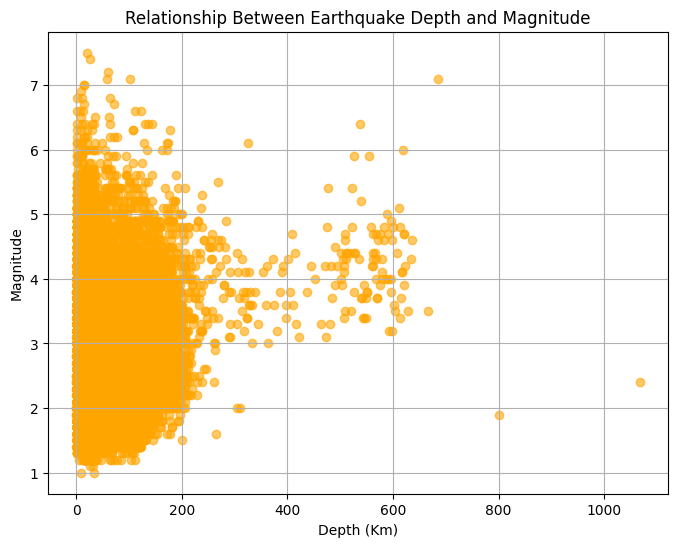

,Depth_In_Km,Magnitude
Depth_In_Km,1.000000,0.063981
Magnitude,0.063981,1.000000


In [14]:
# Explore the correlation between depth and magnitude
correlation = earthquake_data_filtered[['Depth_In_Km', 'Magnitude']].corr()

# Create a scatter plot to visualize the relationship between depth and magnitude
plt.figure(figsize=(8, 6))
plt.scatter(earthquake_data_filtered['Depth_In_Km'], earthquake_data_filtered['Magnitude'], alpha=0.6, c='orange')
plt.title('Relationship Between Earthquake Depth and Magnitude')
plt.xlabel('Depth (Km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Display the correlation coefficient
correlation


### Analysis of the Relationship Between Earthquake Depth and Magnitude:
1. Scatter Plot Insights:
    - The scatter plot shows the relationship between earthquake depth and magnitude. The majority of earthquakes occur at shallower depths (below 200 km), and there is a wide range of magnitudes for these shallow earthquakes.
    - Some deeper earthquakes (above 300 km) tend to have magnitudes between 4.0 and 6.0, but they are fewer in number.
2. Correlation Coefficient:
    - The correlation between depth and magnitude is quite low, with a value of 0.064. This suggests that there is almost no linear relationship between the depth of an earthquake and its magnitude.
    - In other words, deeper earthquakes are not necessarily stronger, and stronger earthquakes are not necessarily deeper.
#### Additional Insights:
- **Shallow Earthquakes**: The majority of earthquakes happen at depths of less than 200 km, with a significant number having magnitudes between 2.0 and 5.0. These are likely to be the most frequent seismic events.
- **Deep Earthquakes**: Deeper earthquakes, though less frequent, tend to have a moderate magnitude. These could be related to subduction zones where one tectonic plate moves beneath another.
### Conclusion:
The analysis suggests that depth and magnitude are not strongly correlated, meaning that the depth of an earthquake doesn't predict how strong it will be. This insight can help in understanding the nature of seismic activity in the region, where shallow earthquakes are more frequent but can vary widely in magnitude.

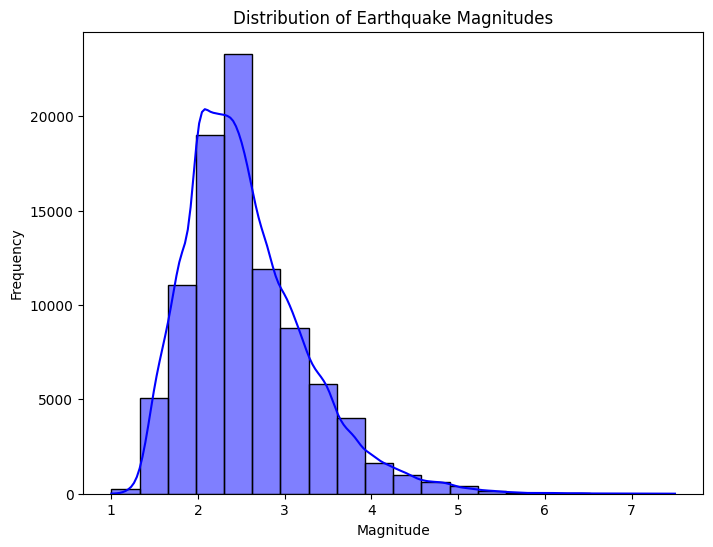

In [9]:
# 3. Magnitude Distribution
plt.figure(figsize=(8, 6))
sns.histplot(earthquake_data['Magnitude'], bins=20, kde=True, color='b')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

### Observations:
1. Most Frequent Magnitude Range (2.0 - 3.0):
    - The majority of earthquakes have magnitudes between 2.0 and 3.0. This is the most common range for the dataset, with a peak frequency of over 20,000 occurrences.
    - These are relatively minor earthquakes and are generally not destructive, though they are frequently recorded.
2. Right-Skewed Distribution:
    - The distribution is right-skewed, meaning that there are a few stronger earthquakes (with magnitudes above 4.0) that occur less frequently.
    - Most earthquakes tend to cluster around lower magnitudes, with fewer instances of high-magnitude earthquakes (above 5.0).
3. Decreasing Frequency of Stronger Earthquakes:
    - As the magnitude increases beyond 3.0, the frequency of earthquakes decreases significantly. There are very few earthquakes above magnitude 5.0 and even fewer above 6.0.
#### Insights:
- **Minor Earthquakes Are Common**: Most of the earthquakes in this region are small and unlikely to cause significant damage. This is typical in regions where minor seismic activity is frequent but major seismic events are rare.
- **High Magnitude Events Are Rare**: Earthquakes with magnitudes above 5.0 occur infrequently, but when they do, they can be more impactful. It’s worth noting that even though these larger magnitude events are less frequent, they could have significant consequences depending on their location and depth.
- **Potential for Larger Events**: While the dataset is dominated by smaller earthquakes, the existence of larger magnitudes (above 6.0) suggests that the region has the potential for more significant seismic activity, though these events are rare.

This distribution aligns with typical earthquake patterns in many regions where small, frequent tremors are common, but stronger quakes occur infrequently.

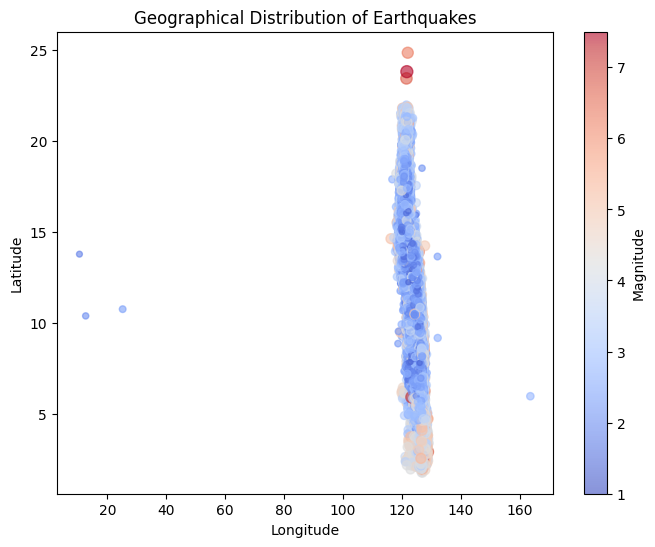

In [8]:
# 4. Geographical Distribution: Scatter plot of Latitude vs Longitude

# Convert Latitude and Longitude to numeric, coercing any invalid entries to NaN
earthquake_data['Latitude'] = pd.to_numeric(earthquake_data['Latitude'], errors='coerce')
earthquake_data['Longitude'] = pd.to_numeric(earthquake_data['Longitude'], errors='coerce')

# Filter out rows where Latitude or Longitude is NaN
earthquake_data_filtered = earthquake_data.dropna(subset=['Latitude', 'Longitude'])

# Regenerate the geographical scatter plot with transparency (alpha) to reduce overplotting
plt.figure(figsize=(8, 6))
plt.scatter(earthquake_data_filtered['Longitude'], earthquake_data_filtered['Latitude'], 
            c=earthquake_data_filtered['Magnitude'], cmap='coolwarm', 
            s=earthquake_data_filtered['Magnitude']*10, alpha=0.6)
plt.colorbar(label='Magnitude')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Geographical Distribution of Earthquake Plot:

1. **Latitude vs Longitude** - The points represent earthquake locations based on their latitude and longitude.
2. **Color and Size Representation** - The color of each point represents the earthquake's magnitude, with darker red indicating stronger earthquakes and blue representing weaker ones. The size of each point is also proportional to the earthquake’s magnitude.
3. **Concentrated Region** - It appears that the majority of the earthquake epicenters are clustered around a particular range of longitudes, which likely represents a tectonically active region.

### Observations:
- Most earthquakes are located around the longitude of approximately 120 to 130 degrees, which aligns with the geographical region of the Philippines.
- There is a notable clustering of larger magnitude earthquakes (red points) in this region.
- The plot suggests that the seismic activity is concentrated along a fault line or tectonic boundary, which could be related to the Philippine Trench or other geological structures in the area.

/tmp/ipykernel_91095/1999501925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_data_filtered['Date'] = earthquake_data_filtered['Date_Time_PH'].dt.date


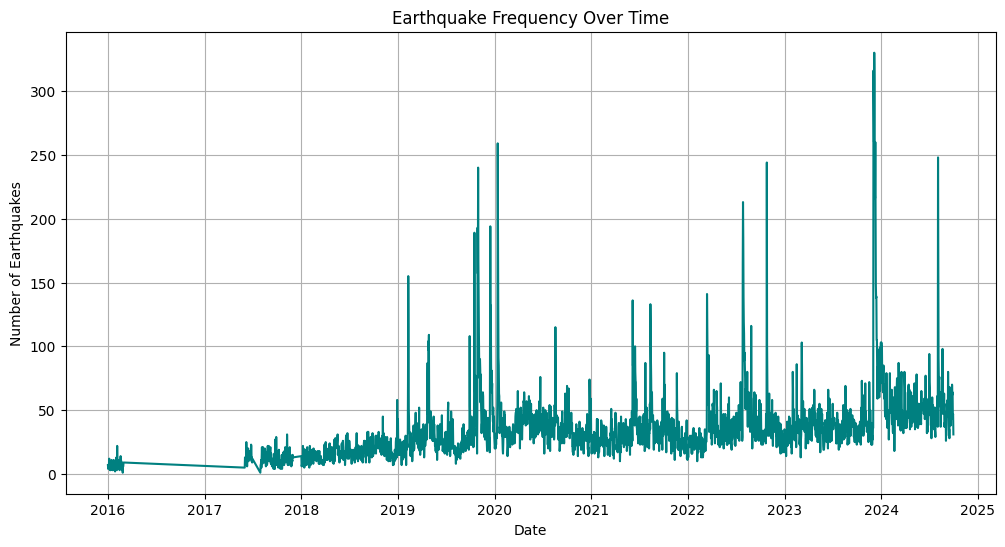

In [15]:
# Create a column for just the date (without the time) to count daily occurrences
earthquake_data_filtered['Date'] = earthquake_data_filtered['Date_Time_PH'].dt.date

# Count the number of earthquakes per day
earthquake_frequency = earthquake_data_filtered.groupby('Date').size()

# Plot the earthquake frequency over time
plt.figure(figsize=(12, 6))
earthquake_frequency.plot(color='teal')
plt.title('Earthquake Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()


The **Earthquake Frequency Over Time** plot displays the number of earthquakes occurring each day from 2016 to 2024. Here are some insights from the plot:

### Observations:
1. Increase in Seismic Activity After 2019:
   - The graph shows a clear increase in seismic activity starting around 2019. Prior to this, the number of daily earthquakes was relatively low and stable.
   - From 2019 onwards, the frequency of earthquakes increases significantly, with daily counts often exceeding 50 and sometimes reaching over 300 earthquakes in a single day.
2. Spikes in Earthquake Frequency:
    - There are notable spikes where the number of earthquakes exceeds 250 to 300 in a single day. These spikes suggest periods of intense seismic activity, possibly due to major tectonic shifts or aftershock sequences following larger earthquakes.
    - These spikes are particularly visible in late 2019, mid-2020, and early 2024.
3. Regular Fluctuations:
    - There seems to be a recurring pattern of fluctuations in earthquake frequency. Although the average daily frequency has increased, there are frequent spikes and drops in the number of earthquakes, which could indicate clusters of aftershocks following larger events.
4. Recent Stability:
    - While there are still fluctuations in 2023 and 2024, the number of earthquakes seems to be relatively consistent compared to earlier spikes. This could indicate that seismic activity has somewhat stabilized in recent years, though still at a higher level than pre-2019.

#### Potential Causes:
- The increase in seismic activity could be due to several factors, including tectonic plate movements, volcanic activity, or improved seismic monitoring techniques leading to better detection of smaller earthquakes.
- The spikes in earthquake counts may correspond to larger events followed by aftershocks, which is typical in earthquake-prone regions.

Region
Bicol Region         197
Cagayan Valley      2778
Central Visayas      338
Davao Region       16826
Ilocos              3642
Mindanao           20203
Other              49111
dtype: int64


/tmp/ipykernel_91095/2660818410.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_data_filtered['Region'] = earthquake_data_filtered['Location'].apply(categorize_region)


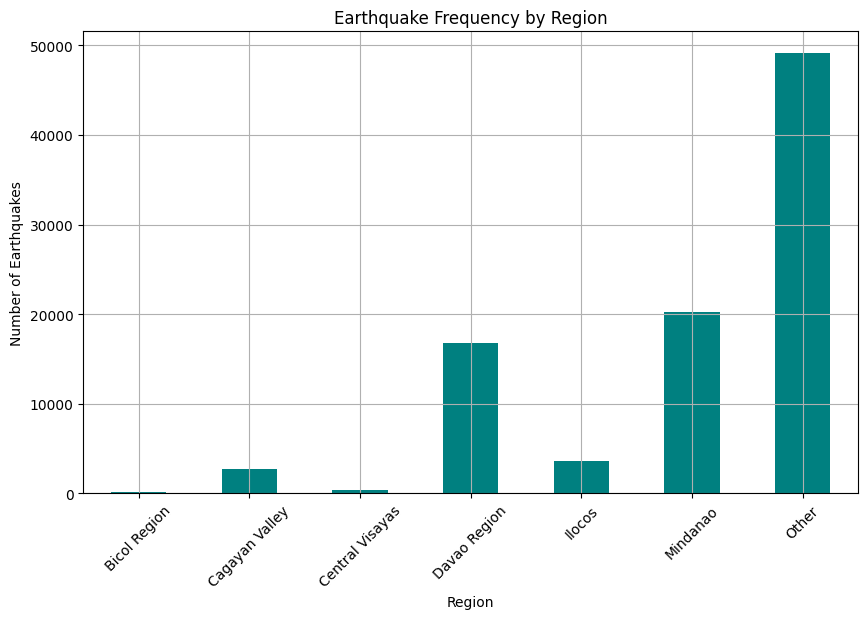

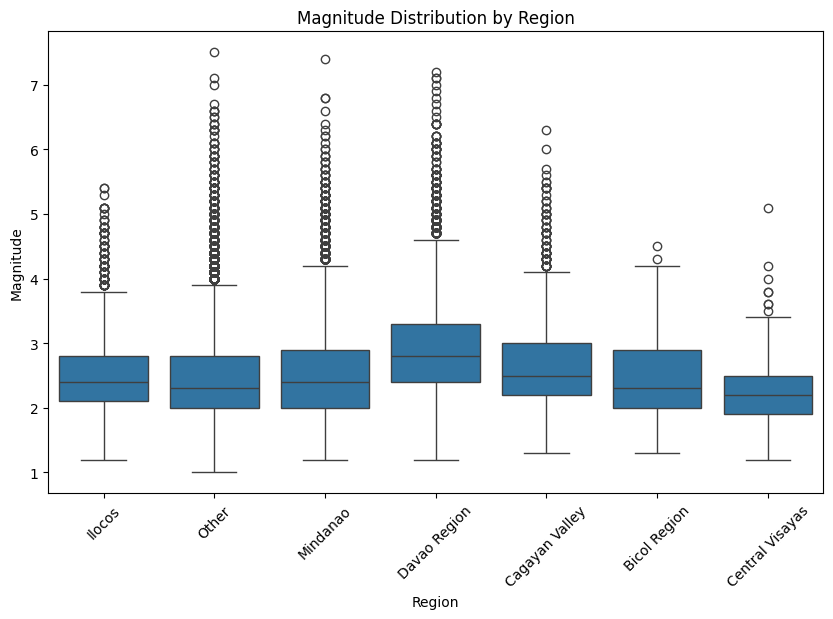

In [19]:
import numpy as np

# Define a function to categorize earthquakes based on location descriptions
def categorize_region(location):
    if 'Ilocos' in location:
        return 'Ilocos'
    elif 'Cagayan' in location:
        return 'Cagayan Valley'
    elif 'Bicol' in location or 'Albay' in location:
        return 'Bicol Region'
    elif 'Davao' in location:
        return 'Davao Region'
    elif 'Surigao' in location or 'Mindanao' in location:
        return 'Mindanao'
    elif 'Cebu' in location or 'Visayas' in location:
        return 'Central Visayas'
    elif 'Luzon' in location or 'Manila' in location:
        return 'Central Luzon'
    else:
        return 'Other'

# Apply the categorization to the dataset
earthquake_data_filtered['Region'] = earthquake_data_filtered['Location'].apply(categorize_region)

# Group by region and count the number of earthquakes
earthquake_by_region = earthquake_data_filtered.groupby('Region').size()

# Display the number of earthquakes per region
print(earthquake_by_region)

# Plot earthquake frequency by region
plt.figure(figsize=(10, 6))
earthquake_by_region.plot(kind='bar', color='teal')
plt.title('Earthquake Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Magnitude distribution per region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Magnitude', data=earthquake_data_filtered)
plt.title('Magnitude Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()


### Insights from the Earthquake Frequency by Region:
1. Highest Frequency in the "Other" Category:
    - The "Other" category has the highest number of earthquakes, with nearly 50,000 occurrences. This suggests that many earthquakes are either not precisely categorized or occur in less defined regions.
    - It may indicate the need for further refinement of regional boundaries or more detailed location data.
2. Significant Activity in Mindanao and Davao:
    - The Mindanao and Davao Region show significant earthquake activity, with more than 10,000 earthquakes recorded in each region. These regions are known for their proximity to tectonic plate boundaries and active fault lines, making them more prone to seismic activity.
3. Lower Activity in Central and Northern Regions:
    - Regions like Central Visayas, Ilocos, and the Bicol Region experience fewer earthquakes compared to Mindanao and Davao. While still seismically active, these regions see significantly fewer events, suggesting they may be further from major fault lines or tectonic boundaries.
    
### Insights from the Magnitude Distribution by Region (Box Plot):
1. Median Magnitude Around 2.0-3.0:
    - Across all regions, the median magnitude of earthquakes is consistently between 2.0 and 3.0, which aligns with the earlier analysis of the magnitude distribution. Most earthquakes in all regions tend to be small or moderate in size.
2. Davao and Mindanao Regions Experience Stronger Earthquakes:
    - The Davao Region and Mindanao not only have a higher number of earthquakes but also tend to have a larger range of magnitudes. The box plot shows higher outliers in these regions, indicating the occurrence of stronger earthquakes (above 5.0 in magnitude).
3. "Other" Category Contains a Wide Range:
    - The "Other" category shows a wide distribution in magnitude, with many outliers above magnitude 4.0. This suggests that the "Other" region may contain a mix of different seismic zones, contributing to the variety in earthquake strength.
4. Relatively Weak Earthquakes in the Bicol Region:
    - The Bicol Region has a narrower magnitude range, with fewer high-magnitude outliers. This indicates that while the region experiences seismic activity, the earthquakes tend to be smaller in magnitude compared to more seismically active regions like Davao or Mindanao.

In [18]:
import folium
from folium.plugins import HeatMap

# Filter only necessary columns (Latitude, Longitude, Magnitude)
heatmap_data = earthquake_data_filtered[['Latitude', 'Longitude', 'Magnitude']].dropna()

# Create a map centered on the Philippines
m = folium.Map(location=[12.8797, 121.7740], zoom_start=5)

# Add a heatmap to the map
HeatMap(data=heatmap_data[['Latitude', 'Longitude']].values, radius=10).add_to(m)

# Save the map as an HTML file or display it inline if in a notebook environment
m.save("earthquake_heatmap.html")

# To display in a notebook environment, simply use:
m


## Final Conclusion and Insights from the Earthquake Data Analysis
Based on the extensive analysis of earthquake data from the Philippine Institute of Volcanology and Seismology, here are the key insights and conclusions:

1. **Earthquake Frequency Over Time**:
    - **Significant Increase Since 2019** - Earthquake activity has increased significantly since 2019, with more frequent events and notable spikes in daily counts (some exceeding 300 earthquakes per day). This could be related to tectonic shifts or improved detection systems.
    - **Recurring Patterns** - There are frequent fluctuations in earthquake frequency, suggesting that certain periods experience clusters of seismic activity, potentially due to aftershocks following larger events.
2. **Magnitude Distribution**:
    - **Majority are Minor Earthquakes** - Most earthquakes have magnitudes between 2.0 and 3.0, indicating that the majority of seismic activity consists of small, non-destructive events.
    - **Right-Skewed Distribution** - While small earthquakes are more common, larger earthquakes (above magnitude 5.0) are rarer but still present, emphasizing the need for disaster preparedness in case of stronger events.
3. **Geographical Distribution and Heatmap**:
    - **Seismic Hotspots in Mindanao and Davao** - The Mindanao and Davao regions exhibit both high earthquake frequency and higher magnitude ranges, suggesting they are major seismic hotspots due to their proximity to active fault lines and tectonic plates.
    - **Lower Activity in Central and Northern Regions** - Regions such as Ilocos, Bicol, and Central Visayas experience fewer earthquakes and generally lower magnitudes, indicating they are less seismically active compared to the southern Philippines.
4. **Depth and Magnitude Correlation**:
    - **Weak Correlation Between Depth and Magnitude** - The analysis shows a low correlation between the depth of earthquakes and their magnitude. Deeper earthquakes are not necessarily stronger, and most seismic events occur at shallow depths (below 200 km).
    - **Shallow Earthquakes Are Common** - A significant number of earthquakes occur at shallow depths, which can cause more surface-level damage despite their relatively lower magnitudes.
5. **Regional Analysis**:
    - **Mindanao and Davao at Higher Risk** - These regions not only experience more frequent earthquakes but also tend to have stronger seismic events. This suggests that they are more vulnerable to destructive earthquakes and should prioritize preparedness and mitigation efforts.
    - **Magnitude Consistency Across Regions** - Most regions exhibit a median earthquake magnitude between 2.0 and 3.0, though certain regions like Davao and Mindanao are more prone to stronger earthquakes.
#### Overall Insights:
- **Frequent but Small Earthquakes** - The dataset indicates a large number of small, non-destructive earthquakes, particularly in regions like Ilocos and Bicol. While these are unlikely to cause significant damage, the occasional larger earthquake warrants attention.

- **Regional Risk** - The Mindanao and Davao regions are the most seismically active, with frequent and stronger earthquakes, making them higher-risk areas. Monitoring and early warning systems should be a priority in these regions.

- **Trends Over Time** - Seismic activity has increased in frequency over the past few years, possibly reflecting both natural tectonic movements and improved detection methods. Preparedness efforts should focus on regions experiencing more frequent and stronger events.

### Final Recommendation:
Efforts should be focused on enhancing earthquake preparedness, particularly in regions like **Mindanao** and **Davao**, which are at higher risk of both frequent and strong earthquakes. Furthermore, ongoing monitoring of earthquake trends and improved categorization of regions can aid in better understanding and managing seismic risks across the Philippines.

For the next step, it is possible to use this same dataset to perform **predictive analytics** and build a model to estimate the likelihood of future earthquakes. However, predicting the exact occurrence of earthquakes is inherently challenging due to the complex nature of seismic activity. Instead of predicting the exact time and location of earthquakes, we can focus on **statistical forecasting models** that predict earthquake patterns or probability over time, based on historical data.

#### Steps for Building a Predictive Model:
1. Data Preprocessing:
    - Clean and prepare the dataset by ensuring that key features like date, magnitude, depth, and location are appropriately formatted.
    - Aggregate data to daily, weekly, or monthly counts of earthquakes to simplify the modeling process.
2. Feature Engineering:
    - Create time-based features such as year, month, and seasonality patterns (e.g., number of earthquakes per month or year).
    - Consider other derived features such as average depth, magnitude trends, and regional seismic patterns.
3. Modeling Approach:
    - Time Series Forecasting Models: Since earthquake occurrences can be viewed as a time series, models like ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), or Prophet can be used to forecast future earthquake activity based on past trends.
    - Classification Models: Machine learning models like Random Forest, Logistic Regression, or Gradient Boosting can be trained to predict the probability of an earthquake exceeding a certain magnitude or occurring in a particular region, based on historical seismic activity.
    - Survival Analysis: This type of statistical analysis could be used to estimate the time until the next earthquake, based on the time intervals between past earthquakes.
Evaluation:

Evaluate the model performance using techniques like cross-validation, and measure its effectiveness using metrics such as accuracy, precision, recall, and AUC-ROC (if using classification models).